## Objective

Analyze breast cancer data to understand if a patient tumor is benign or malignant

In [1]:
# Libraries
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
import seaborn as sns
import pandas as pd

In [25]:
# Load Data
df = pd.read_csv("breast-cancer.csv")

## Data Checks

In [3]:
# See the rows of information
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Get list of columns
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
# data summary
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# check for nulls
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Exploration


Diagnosis Counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


/tmp/ipython-input-8-1461353361.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


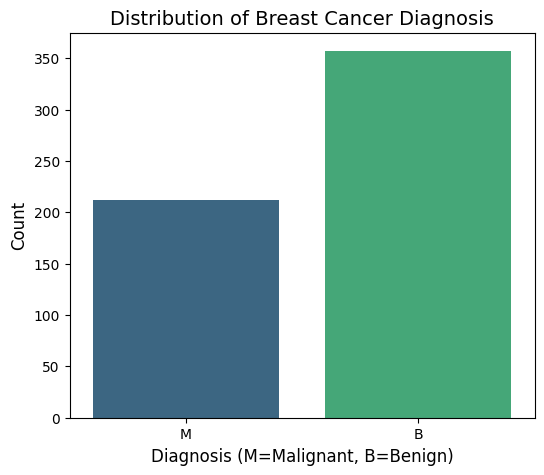

In [8]:
# Looking at the diagnosis count
diagnosis_counts = df['diagnosis'].value_counts()
print("\nDiagnosis Counts:")
print(diagnosis_counts)

# Plot the diagnosis distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Breast Cancer Diagnosis', fontsize=14)
plt.xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('diagnosis_distribution.png')
# diagnosis is a bit imbalanced but fairly distributed

In [9]:
# Summary statistics
# Exclude 'id' and 'diagnosis' columns
numerical_df = df.drop(columns=['id', 'diagnosis'])
summary_stats = numerical_df.describe().T # .T for better readability
print("\nSummary Statistics (Transposed):")
print(summary_stats.to_markdown(index=True, numalign="left", stralign="left"))


Summary Statistics (Transposed):
|                         | count   | mean       | std        | min       | 25%      | 50%      | 75%      | max     |
|:------------------------|:--------|:-----------|:-----------|:----------|:---------|:---------|:---------|:--------|
| radius_mean             | 569     | 14.1273    | 3.52405    | 6.981     | 11.7     | 13.37    | 15.78    | 28.11   |
| texture_mean            | 569     | 19.2896    | 4.30104    | 9.71      | 16.17    | 18.84    | 21.8     | 39.28   |
| perimeter_mean          | 569     | 91.969     | 24.299     | 43.79     | 75.17    | 86.24    | 104.1    | 188.5   |
| area_mean               | 569     | 654.889    | 351.914    | 143.5     | 420.3    | 551.1    | 782.7    | 2501    |
| smoothness_mean         | 569     | 0.0963603  | 0.0140641  | 0.05263   | 0.08637  | 0.09587  | 0.1053   | 0.1634  |
| compactness_mean        | 569     | 0.104341   | 0.0528128  | 0.01938   | 0.06492  | 0.09263  | 0.1304   | 0.3454  |
| concavity_me

In [10]:
# Correlation analysis
# Convert 'diagnosis' to numerical for correlation analysis (Malignant=1, Benign=0)
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select only the 'mean' features and the numeric diagnosis for the correlation matrix
mean_cols = [col for col in df.columns if 'mean' in col or col == 'diagnosis_numeric']
correlation_df = df[mean_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()


Correlation with Diagnosis (Mean Features):
|                        | diagnosis_numeric   |
|:-----------------------|:--------------------|
| concave points_mean    | 0.776614            |
| perimeter_mean         | 0.742636            |
| radius_mean            | 0.730029            |
| area_mean              | 0.708984            |
| concavity_mean         | 0.69636             |
| compactness_mean       | 0.596534            |
| texture_mean           | 0.415185            |
| smoothness_mean        | 0.35856             |
| symmetry_mean          | 0.330499            |
| fractal_dimension_mean | -0.0128376          |


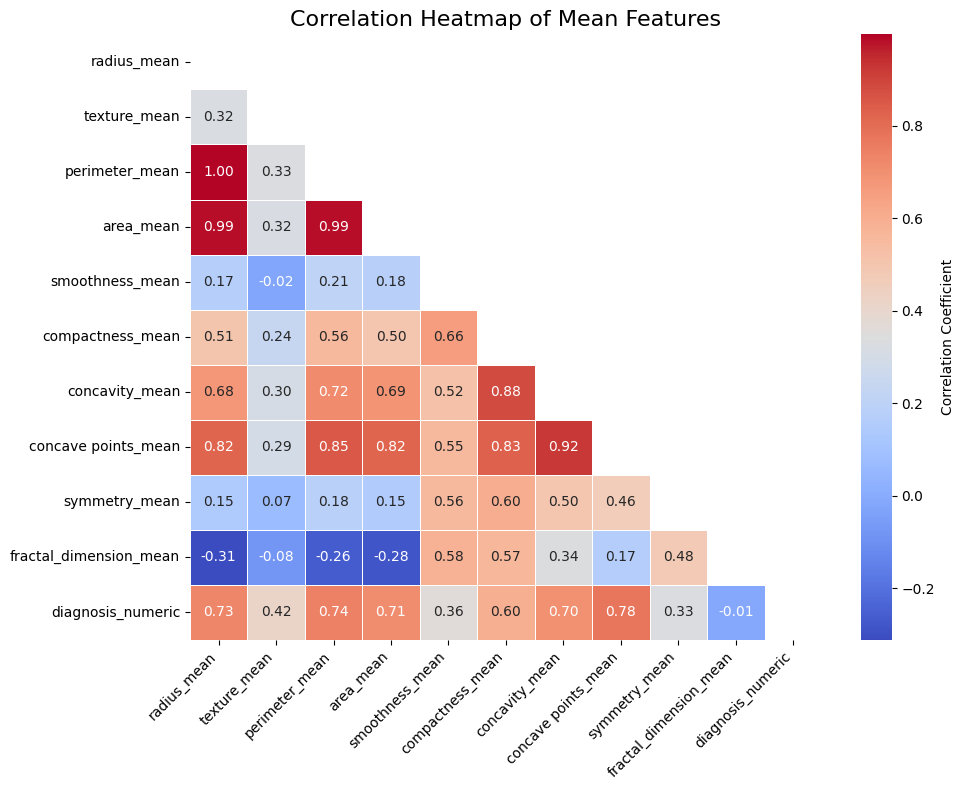

In [11]:
# Extract correlations with the 'diagnosis_numeric' column, sort, and display
diagnosis_corr = correlation_matrix['diagnosis_numeric'].sort_values(ascending=False).drop('diagnosis_numeric')
print("\nCorrelation with Diagnosis (Mean Features):")
print(diagnosis_corr.to_markdown(index=True, numalign="left", stralign="left"))

# Create a heatmap for all mean features' correlation
plt.figure(figsize=(10, 8))
# Use a diverging colormap and mask the upper triangle for better visualization
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=.5,
            mask=mask,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Mean Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap_mean_features.png')

## ML Modelling

In [26]:
# Drop first column
df.drop('id', axis=1, inplace=True)

In [13]:
# rescale all variables except the target variable
#df_scale = df.loc[:, df.columns!='diagnosis']
##scaler = preprocessing.MinMaxScaler()
#df_scale = scaler.fit_transform(df_scale)
#df_scale = pd.DataFrame(df_scale)
#df_scale.reset_index(drop=True, inplace=True)

In [14]:
# combine rescaled value
#df['diagnosis'].reset_index(drop=True, inplace=True)
#df = pd.concat([df_scale,df['diagnosis']], axis=1)
#df_1 = df.columns.values.tolist()


In [27]:
# Split data into predictors and predicted
y= df['diagnosis']
X= df.iloc[:,1:-1]

In [28]:
# Label encoding for dignosis class label
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

y = df['diagnosis']

In [29]:
# Feature selection
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth = 6, random_state=32)

clf.fit(X, y)

imp = clf.feature_importances_

importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

print(X.columns[sorted_indices], sep = "\n")

Index(['radius_worst', 'perimeter_worst', 'concave points_mean',
       'concave points_worst', 'area_mean', 'area_worst', 'texture_worst',
       'concavity_worst', 'concavity_mean', 'texture_mean', 'radius_se',
       'concave points_se', 'perimeter_se', 'smoothness_se', 'area_se',
       'concavity_se', 'smoothness_worst', 'compactness_se',
       'compactness_worst', 'compactness_mean', 'fractal_dimension_se',
       'radius_mean', 'smoothness_mean', 'symmetry_worst', 'symmetry_se',
       'fractal_dimension_mean', 'symmetry_mean', 'texture_se',
       'perimeter_mean'],
      dtype='object')


In [30]:
# new predictor information
n_features = 10 # Select the top 10 features, you can adjust this number
d = X.columns[sorted_indices]
X_new = X[d[:n_features]]

In [31]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 32)

from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

transformation = RobustScaler()
d = transformation.fit(X_train)

X_train = d.transform(X_train)
X_test = d.transform(X_test)
X_train

array([[ 1.25174825e+00,  1.14228809e+00,  1.82507924e+00, ...,
         1.14374588e+00,  1.49041922e+00,  1.32879046e-01],
       [ 9.30069930e-01,  7.74412747e-01,  1.20879556e+00, ...,
         1.91592044e+00,  1.49041922e+00,  7.06984668e-01],
       [ 2.17657343e+00,  2.09829535e+00,  1.21255943e+00, ...,
         1.16787633e+00,  8.54294329e-01,  5.77512777e-01],
       ...,
       [-1.81818182e-01, -1.35668678e-01,  7.29001585e-02, ...,
         6.01376190e-02,  7.78134423e-04,  5.17887564e-01],
       [-3.95104895e-01, -3.82637221e-01, -4.41561014e-01, ...,
        -5.59147893e-01, -4.30308336e-01,  5.96252129e-02],
       [-7.04545455e-01, -6.48585320e-01, -1.26584786e-01, ...,
        -1.03497031e-01, -7.78134423e-04,  1.50766610e+00]])

In [20]:
#!pip install dabl
import dabl

In [32]:
# See classifications using simple classication algorithms
classifier = dabl.SimpleClassifier(random_state=0)
classifier.fit(X_train, y_train)

Running DummyClassifier(random_state=0)
accuracy: 0.633 average_precision: 0.367 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.388
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.633 average_precision: 0.367 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.388

Running GaussianNB()
accuracy: 0.957 average_precision: 0.909 roc_auc: 0.984 recall_macro: 0.956 f1_macro: 0.955
=== new best GaussianNB() (using recall_macro):
accuracy: 0.957 average_precision: 0.909 roc_auc: 0.984 recall_macro: 0.956 f1_macro: 0.955

Running MultinomialNB()
accuracy: 0.661 average_precision: 0.415 roc_auc: 0.828 recall_macro: 0.538 f1_macro: 0.461
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.927 average_precision: 0.842 roc_auc: 0.929 recall_macro: 0.929 f1_macro: 0.923
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)
accuracy: 0.955 average_precision: 0.903 roc_auc: 0.955 recall_macro: 0.953 

SimpleClassifier(random_state=0)

In [33]:
# Leverage weak learners to create stacked-ensemble model
import pickle as pkl
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

LGB_Classifier = lgb.LGBMClassifier()
#LGB_Classifier.fit(X_train, y_train)


RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)
#RF_Classifier.fit(X_train, y_train)


XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)
#XGB_Classifier.fit(X_train, y_train)


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
#LGR_Classifier.fit(X_train, y_train)

KNN_Classifier =  KNeighborsClassifier()

estimators = [LGR_Classifier,XGB_Classifier,RF_Classifier,KNN_Classifier]


from sklearn.ensemble import StackingClassifier


estimators = [
     ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)),
     ('xgb', XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)),
     ('lgr',LogisticRegression(n_jobs=-1, random_state=42)),
     ('knn', KNeighborsClassifier())
]


clff = StackingClassifier(estimators=estimators, final_estimator=lgb.LGBMClassifier())

In [34]:
clff.fit(X_train, y_train).score(X_test, y_test)

[LightGBM] [Info] Number of positive: 146, number of negative: 252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366834 -> initscore=-0.545822
[LightGBM] [Info] Start training from score -0.545822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.9532163742690059

In [35]:
# Model Evaluation
y_pred = clff.predict(X_test)

from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       105
           1       0.95      0.92      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

